In [1]:
import Pkg; Pkg.add("Plots")


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


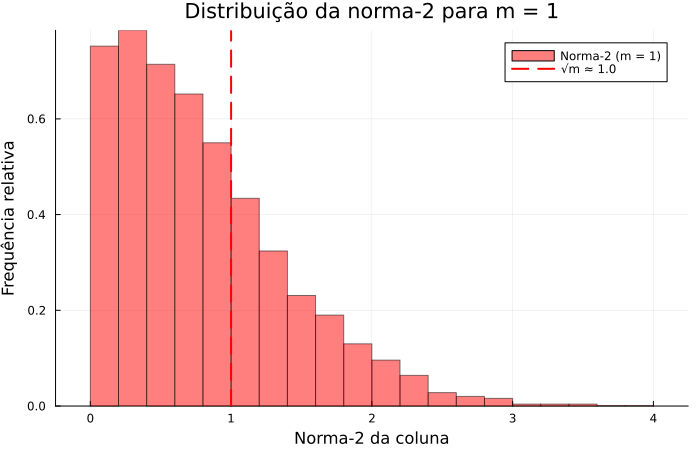

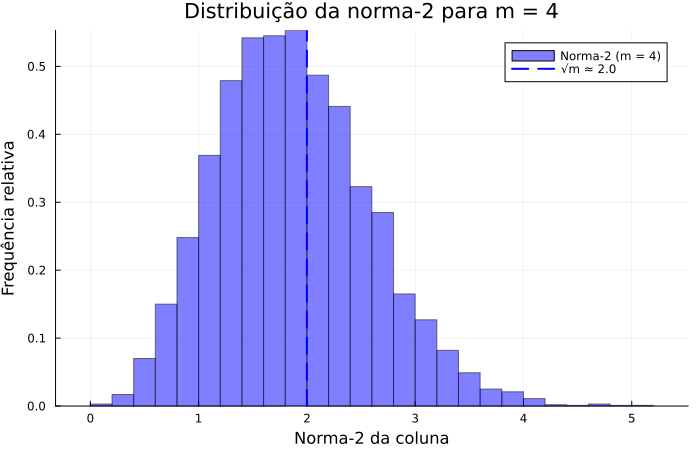

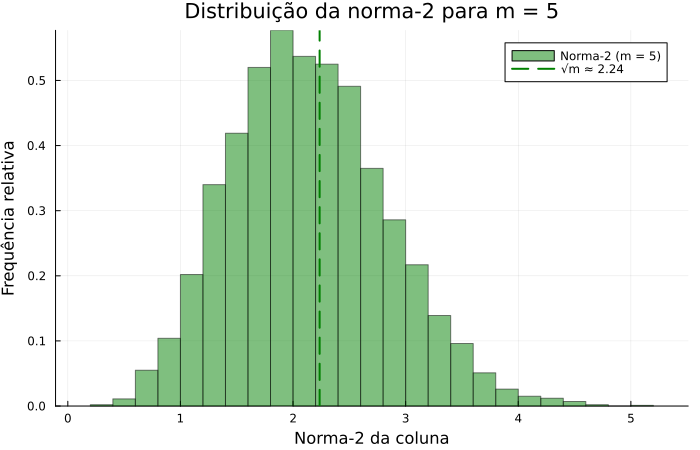

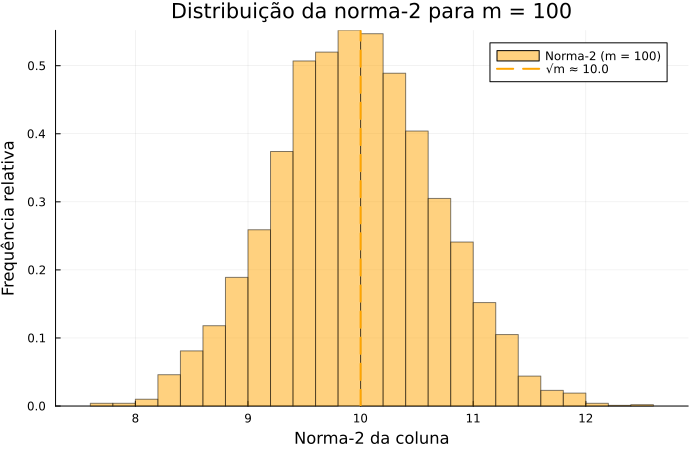

In [ ]:
using Random
using LinearAlgebra
using Plots

#Questão a)

n = 1000
ms = [1, 4, 5, 100]  
colors = [:red, :blue, :green, :orange]

for (i, m) in enumerate(ms)
    A = randn(m, n)
    norms = [norm(A[:,j], 2) for j in 1:n]
    plt = histogram(norms, bins=30, alpha=0.5, normalize=true, 
                    color=colors[i], label="Norma-2 (m = $m)",
                    xlabel="Norma-2 da coluna", ylabel="Frequência relativa",
                    title="Distribuição da norma-2 para m = $m", legend=:topright, size=(700,450))
    valor = round(sqrt(m), digits=2)
    vline!([sqrt(m)], color=colors[i], linewidth=2, linestyle=:dash, 
           label="√m ≈ $valor")
    display(plt)
end


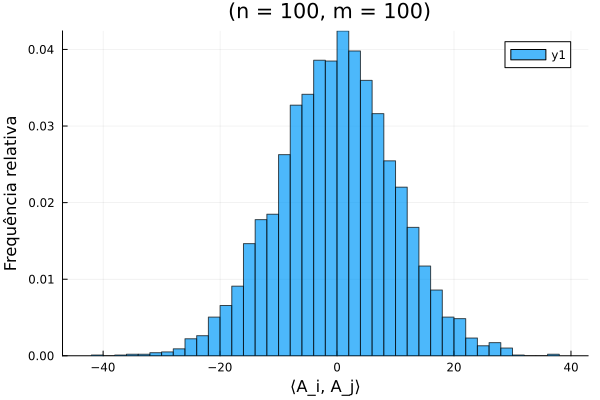

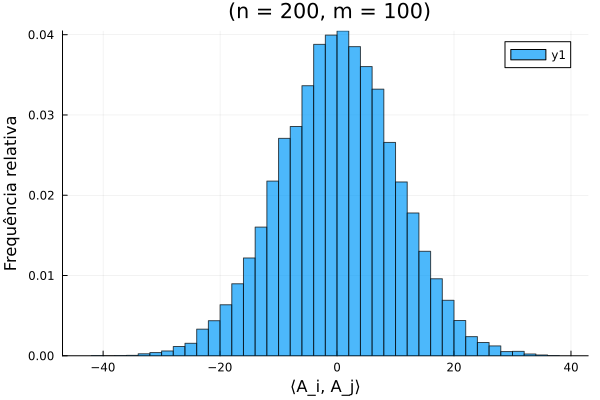

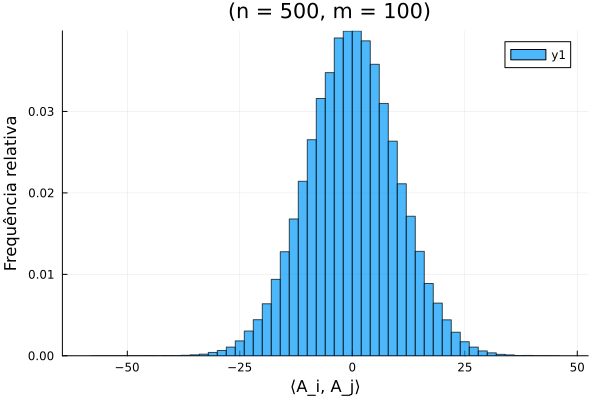

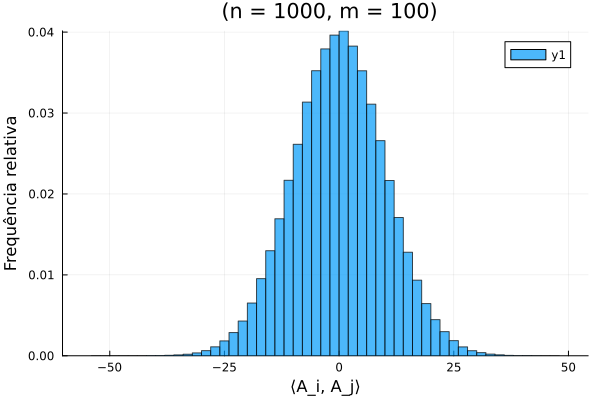

In [16]:
ms = 100
ns = [100, 200, 500, 1000]

#Questão b)

for n in ns
    A = randn(ms, n)
    dot_products = Float64[]
    for i in 1:n-1
        for j in i+1:n
            push!(dot_products, dot(A[:, i], A[:, j]))
        end
    end
    histogram(dot_products, bins=50, normalize=true, alpha=0.7,
              title=" (n = $n, m = $ms)",
              xlabel="⟨A_i, A_j⟩", ylabel="Frequência relativa")

    display(histogram(dot_products, bins=50, normalize=true, alpha=0.7,
              title=" (n = $n, m = $ms)",
              xlabel="⟨A_i, A_j⟩", ylabel="Frequência relativa"))
end

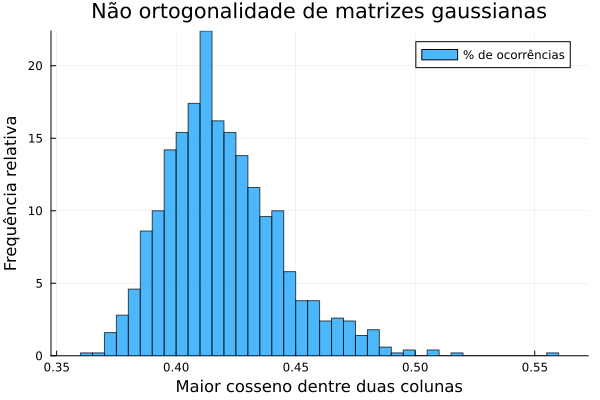

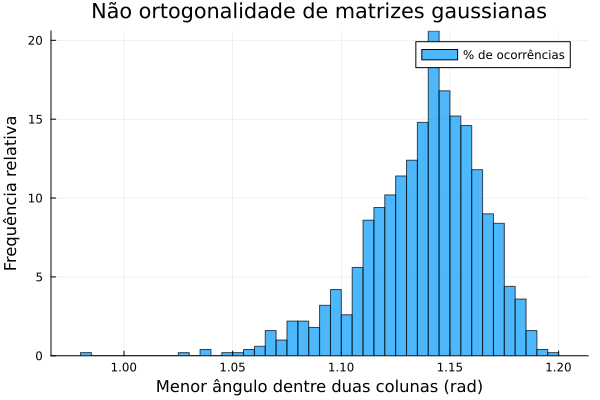

In [9]:
using LinearAlgebra
using Random
using Plots

function maxInnProd(m, n, K)
    listMaxInnProd = Float64[]
    A = zeros(m, n)
    for k in 1:K
        for j in 1:n
            A[:, j] = normalize!(randn(m))
        end
        maxval = 0.0
        for j in 1:n-1
            for l in j+1:n
                val = abs(dot(A[:, j], A[:, l]))
                if val > maxval
                    maxval = val
                end
            end
        end
        push!(listMaxInnProd, maxval)
    end
    return listMaxInnProd
end

M = maxInnProd(100,300,1000)

Hcos = histogram(M, bins=50, normalize=true, alpha=0.7,
              title= "Não ortogonalidade de matrizes gaussianas",
              xlabel="Maior cosseno dentre duas colunas",
              ylabel="Frequência relativa",
              label = "% de ocorrências")
display(Hcos)

angles = [acos(x) for x in M]

Hangle = histogram(angles, bins=45, normalize=true, alpha=0.7,
              title= "Não ortogonalidade de matrizes gaussianas",
              xlabel="Menor ângulo dentre duas colunas (rad)",
              ylabel="Frequência relativa",
              label = "% de ocorrências")

display(Hangle)



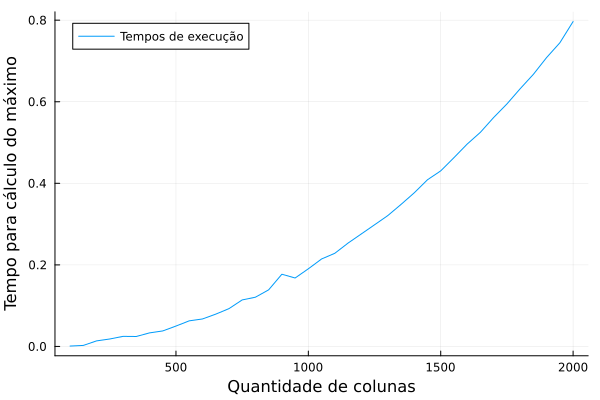

In [10]:
using Random
using Plots

function timeArray(m, nmax, step)
    listOfTimes = Float64[]
    xs = 100:step:nmax
    for k in xs
        execTime = @timed maxInnProd(m, k, 1)
        push!(listOfTimes, execTime.time)
    end
    return collect(xs), listOfTimes
end

xs, execsTimes = timeArray(100, 2000, 50)

p = plot(
    xs,
    execsTimes,
    label = "Tempos de execução",
    xlabel = "Quantidade de colunas",
    ylabel = "Tempo para cálculo do máximo"
)

display(p)

